In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os



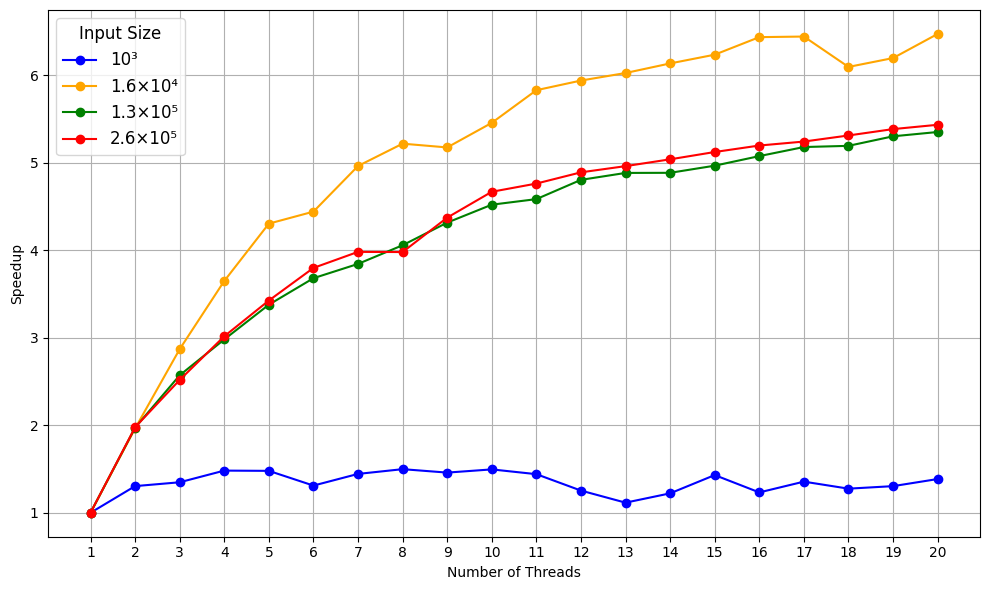

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === CONFIG ===
csv_path = "durata_fft.csv"
output_plot = "speedup_plot.png"
output_csv = "speedup.csv"

# === LEGGI CSV ===
df = pd.read_csv(csv_path)
df = df[df["Eseguibile"] == "OMP_FFT.exe"]

# Calcola lo speedup rispetto alla versione con 1 thread per ogni file
speedup_list = []
for file_input in df['File di input'].unique():
    subset = df[df['File di input'] == file_input].copy()
    t1 = subset[subset['Threads'] == 1]["Durata FFT (ms)"].values[0]
    subset['Speedup'] = t1 / subset["Durata FFT (ms)"]
    speedup_list.append(subset)

# Unisci tutti i risultati
speedup_df = pd.concat(speedup_list)

# Salva anche su CSV (opzionale)
speedup_df.to_csv(output_csv, index=False)

# === COLORI e LABELS PERSONALIZZATI ===
ordered_inputs = [
    "data/numbers_1024.txt",
    "data/numbers_16384.txt",
    "data/numbers_131072.txt",
    "data/numbers_262144.txt"
]

color_map = {
    "data/numbers_1024.txt": "blue",
    "data/numbers_16384.txt": "orange",
    "data/numbers_131072.txt": "green",
    "data/numbers_262144.txt": "red"
}

label_map = {
    "data/numbers_1024.txt": "10³",
    "data/numbers_16384.txt": "1.6×10⁴",
    "data/numbers_131072.txt": "1.3×10⁵",
    "data/numbers_262144.txt": "2.6×10⁵"
}

# === PLOT ===
plt.figure(figsize=(10, 6))
for file_input in ordered_inputs:
    subset = speedup_df[speedup_df['File di Input'] == file_input]
    color = color_map[file_input]
    label = label_map[file_input]
    plt.plot(
        subset['Numero Thread'],
        subset['Speedup'],
        marker='o',
        label=label,
        color=color
    )

plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
plt.legend(title="Input Size", fontsize=12, title_fontsize=12)
plt.grid(True)
plt.xticks(sorted(speedup_df['Threads'].unique()))
plt.tight_layout()
plt.savefig(output_plot)
plt.show()


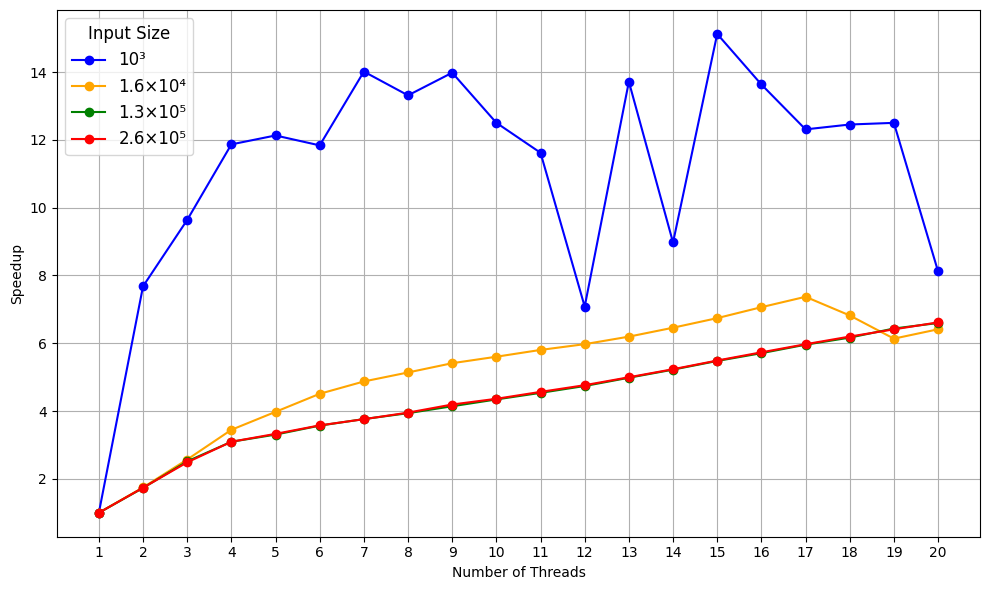

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === CONFIG ===
csv_path = "medie.csv"
output_plot = "speedup_plot.png"
output_csv = "speedup.csv"

# === LEGGI CSV ===
df = pd.read_csv(csv_path)
df = df[df["Eseguibile"] == "OMP_DFT_polar.exe"]

# Calcola lo speedup rispetto alla versione con 1 thread per ogni file
speedup_list = []
for file_input in df['File di Input'].unique():
    subset = df[df['File di Input'] == file_input].copy()
    t1 = subset[subset['Numero Thread'] == 1]['Media Tempo di Esecuzione (ms)'].values[0]
    subset['Speedup'] = t1 / subset['Media Tempo di Esecuzione (ms)']
    speedup_list.append(subset)

# Unisci tutti i risultati
speedup_df = pd.concat(speedup_list)

# Salva anche su CSV (opzionale)
speedup_df.to_csv(output_csv, index=False)

# === COLORI e LABELS PERSONALIZZATI ===
ordered_inputs = [
    "data/numbers_1024.txt",
    "data/numbers_16384.txt",
    "data/numbers_131072.txt",
    "data/numbers_262144.txt"
]

color_map = {
    "data/numbers_1024.txt": "blue",
    "data/numbers_16384.txt": "orange",
    "data/numbers_131072.txt": "green",
    "data/numbers_262144.txt": "red"
}

label_map = {
    "data/numbers_1024.txt": "10³",
    "data/numbers_16384.txt": "1.6×10⁴",
    "data/numbers_131072.txt": "1.3×10⁵",
    "data/numbers_262144.txt": "2.6×10⁵"
}

# === PLOT ===
plt.figure(figsize=(10, 6))
for file_input in ordered_inputs:
    subset = speedup_df[speedup_df['File di Input'] == file_input]
    color = color_map[file_input]
    label = label_map[file_input]
    plt.plot(
        subset['Numero Thread'],
        subset['Speedup'],
        marker='o',
        label=label,
        color=color
    )

plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
plt.legend(title="Input Size", fontsize=12, title_fontsize=12)
plt.grid(True)
plt.xticks(sorted(speedup_df['Numero Thread'].unique()))
plt.tight_layout()
plt.savefig(output_plot)
plt.show()


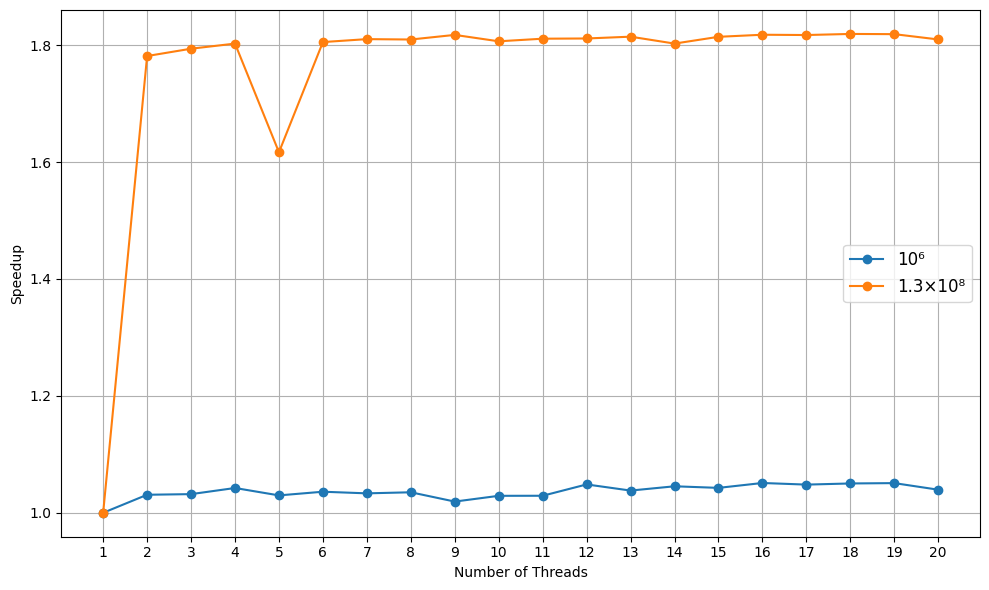

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === CONFIG ===
csv_path = "medie.csv"
output_plot = "speedup_plot.png"
output_csv = "speedup.csv"

# === LEGGI CSV ===
df = pd.read_csv(csv_path)
df = df[df["Eseguibile"] == "OMP_FFT.exe"]

# Calcola lo speedup rispetto alla versione con 1 thread per ogni file
speedup_list = []
for file_input in df['File di Input'].unique():
    subset = df[df['File di Input'] == file_input].copy()
    t1 = subset[subset['Numero Thread'] == 1]['Media Tempo di Esecuzione (ms)'].values[0]
    subset['Speedup'] = t1 / subset['Media Tempo di Esecuzione (ms)']
    speedup_list.append(subset)

# Unisci tutti i risultati
speedup_df = pd.concat(speedup_list)
speedup_df.to_csv(output_csv, index=False)

# === LABEL MAP PERSONALIZZATO ===
label_map = {
    "data/numbers_1048576.txt": "10⁶",
    "data/numbers_134217728.txt": "1.3×10⁸"
}

# === PLOT ===
plt.figure(figsize=(10, 6))

# Ordina input se vuoi controllo su ordine leggenda
ordered_inputs = ["data/numbers_1048576.txt", "data/numbers_134217728.txt"]

# Optional: colori personalizzati
# color_map = {
#     "data/numbers_1048576.txt": "blue",
#     "data/numbers_134217728.txt": "orange"
# }

for file_input in ordered_inputs:
    subset = speedup_df[speedup_df['File di Input'] == file_input]
    label = label_map.get(file_input, os.path.basename(file_input))
    # color = color_map.get(file_input, 'black')
    plt.plot(
        subset['Numero Thread'],
        subset['Speedup'],
        marker='o',
        label=label,
        # color=color
    )

plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
plt.legend( fontsize=12)
plt.grid(True)
plt.xticks(sorted(speedup_df['Numero Thread'].unique()))
plt.tight_layout()
plt.savefig(output_plot)
plt.show()
